In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read input dataset

df = pd.read_csv('/content/sample_data/MegaStore_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***--> Realize that the Item_Weight and Outlet_Size columns have missing values, with Item_Weight being of numerical type and Outlet_Size being of categorical data type.***



In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Numerical cols values replaced with Mean or Interpolate
#Categorical cols with Mode

mean_weight = df['Item_Weight'].mean()
mean_weight

12.857645184135976

In [13]:
df['Item_Weight_Mean'] = df['Item_Weight'].fillna(mean_weight)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


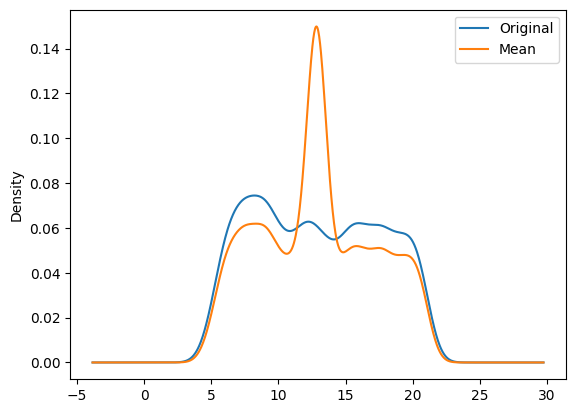

In [15]:
#Data Distribution for Item_Weight_Mean Col

df['Item_Weight'].plot(kind = "kde", label="Original")
df['Item_Weight_Mean'].plot(kind = "kde", label = "Mean")
plt.legend()
plt.show()

--> ***After apply mean, the distribition has been changed, most value are clustered around mean=12.8***
***We will try interpolate values***

In [16]:
df['Item_Weight_interpolate'] = df['Item_Weight'].interpolate(method="linear")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_interpolate
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


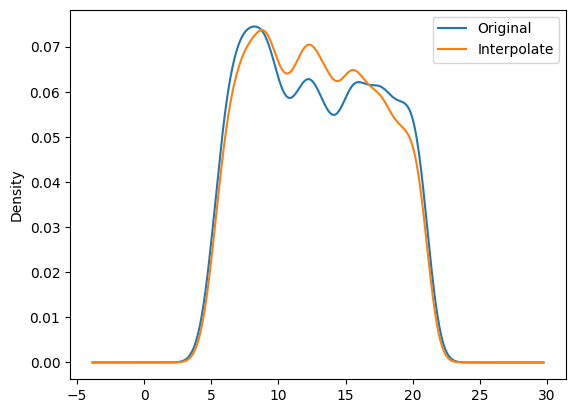

In [17]:
df['Item_Weight'].plot(kind = "kde", label="Original")
df['Item_Weight_interpolate'].plot(kind = "kde", label = "Interpolate")
plt.legend()
plt.show()

--> ***The distribution are very close, and from this, this method is better to fill the NA in the Item_Weight column***


In [18]:
#Remove the columns that not needed

df.drop(['Item_Weight', 'Item_Weight_Mean'], axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

***--> The Outlet_Size seems relevant to Outlet_Type (type of store), so I replaced NA values with the mode of each Outlet_Type***

> Add blockquote



In [20]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
df.loc[(df['Outlet_Size'].isnull()), 'Outlet_Size'] = df['Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [23]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_interpolate
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914,12.831222
std,0.051598,62.275067,8.371760,1706.499616,4.445074
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026989,93.826500,1987.000000,834.247400,9.000000
50%,0.053931,143.012800,1999.000000,1794.331000,12.600000
75%,0.094585,185.643700,2004.000000,3101.296400,16.600000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


<Figure size 600x600 with 0 Axes>

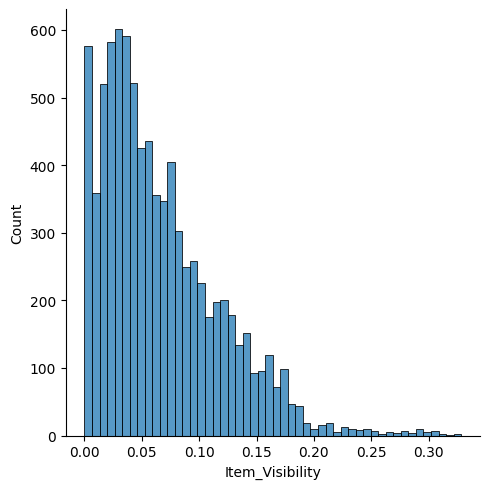

In [24]:
#Data Distribution for Item_Visibility

plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

--> ***The majority of values are between 0 and 0.15, and the distribution is skewed to the right. There are fewer values after 0.20***

<Figure size 600x600 with 0 Axes>

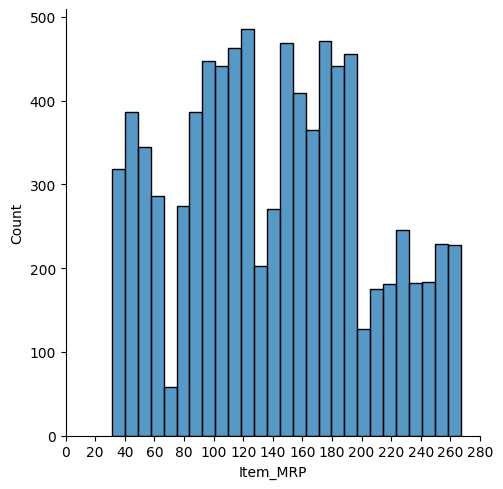

In [25]:
#Data Distribution for Item_MRP

plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
x_ticks = np.arange(0, 300, 20)
plt.xticks(x_ticks)
plt.show()


--> ***The Item Maximun Retail Price from 30 - 270, it came down in 70, 140 and 200***.  

<Figure size 600x600 with 0 Axes>

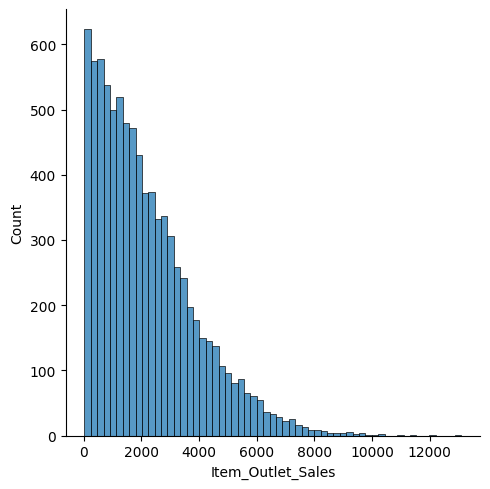

In [26]:
#Data Distribution for Item_Outlet_Sales Col

plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

--> ***The sales remains good at least until 4000, after 4000, the sales decreases.***

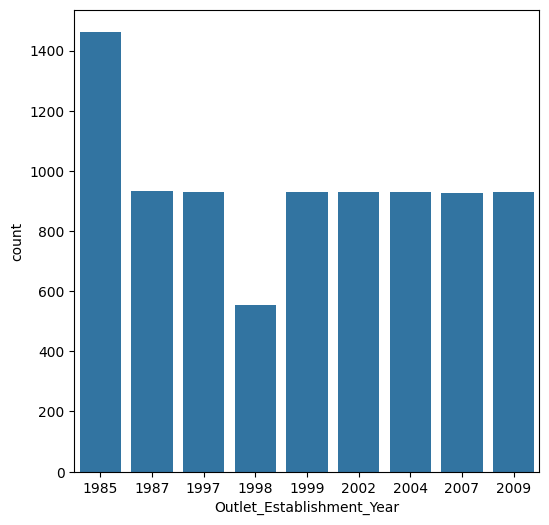

In [27]:
#Countplot for Outlet_Establishment_Year

plt.figure(figsize=(6,6))
sns.countplot(x=df['Outlet_Establishment_Year'], data=df)
plt.show()

--> ***We can see a huge number of sales in 1985. From 1987 to 2009, the sales are distributed evenly, with a slight drop in 1998.***

**We gonna take out the Outlet Age**

In [63]:
import datetime as dt

In [64]:
current_year = dt.datetime.today().year
current_year

2024

In [67]:
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Item_Identifier_Type,Outlet_Age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,FD,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,DR,15
2,FD,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,FD,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,FD,26
4,NC,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,NC,37


In [68]:
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [69]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Item_Identifier_Type,Outlet_Age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,FD,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,DR,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,FD,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,FD,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,NC,37


In [29]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [30]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')


In [31]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [32]:
df['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

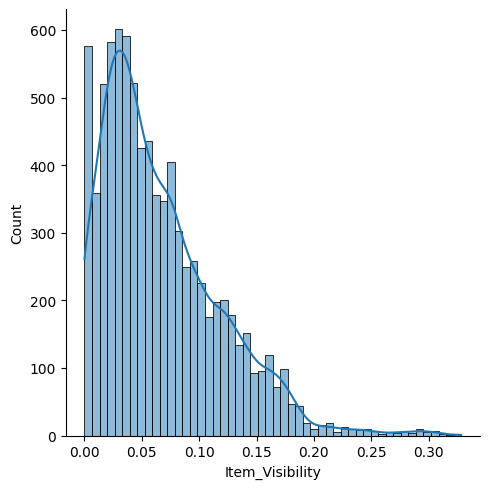

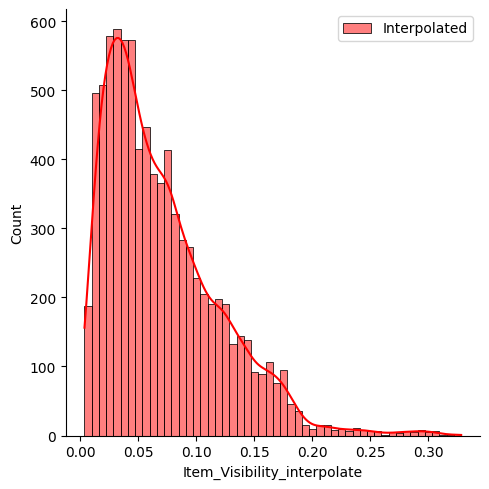

In [33]:
sns.displot(df['Item_Visibility'], kde=True, label='Original')
sns.displot(df['Item_Visibility_interpolate'], kde=True, color='red', label='Interpolated')
plt.legend()
plt.show()

--> The interpolated distribution shows a decrease in 0 values and is skewed to the right. We will drop the original column

In [34]:
df.drop('Item_Visibility', axis=1, inplace=True)
df.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [35]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

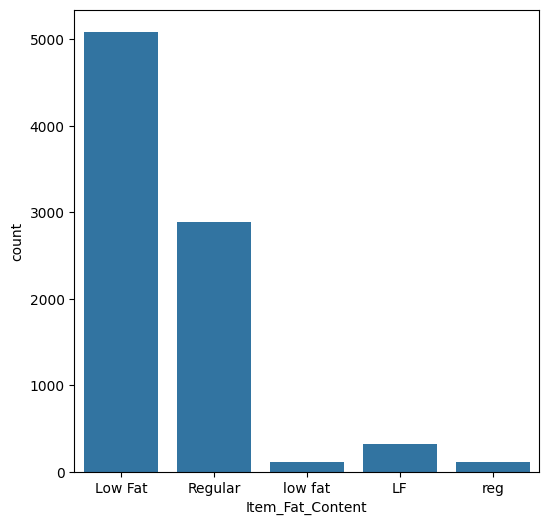

In [36]:
#Countplot others Categorical Col
#Countplot for Item_Fat_Content

plt.figure(figsize=(6,6))
sns.countplot(x=df['Item_Fat_Content'], data=df)
plt.show()


--> Replace the low_fat and LF to Low Fat, reg to Regular

In [37]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)

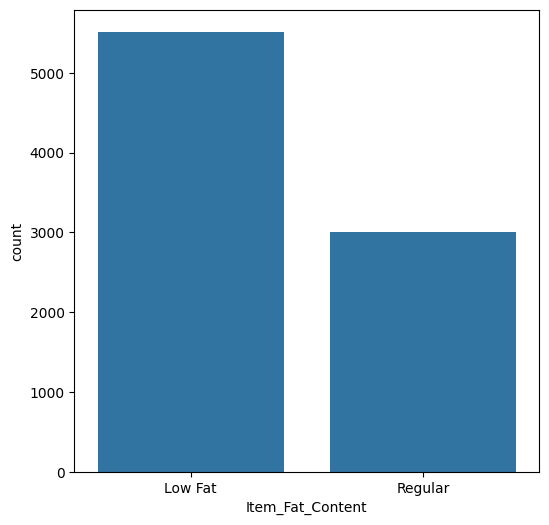

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Item_Fat_Content'], data=df)
plt.show()

--> This column contains 526 values 0, we gonna replace 0 value to NaN and interpolate it

In [39]:
#Handle Item_Identifier column

df['Item_Identifier'].value_counts().sample(10)

Item_Identifier
FDD28    4
NCR30    6
NCA18    4
FDP26    5
FDW51    6
FDU21    7
FDB12    5
NCS54    7
NCD06    5
FDM02    5
Name: count, dtype: int64

--> ***The Indentifier start with 2 characters, we gonna slit this 2 into new column***

In [61]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [62]:
df['Item_Identifier_Type'].value_counts()

Item_Identifier_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

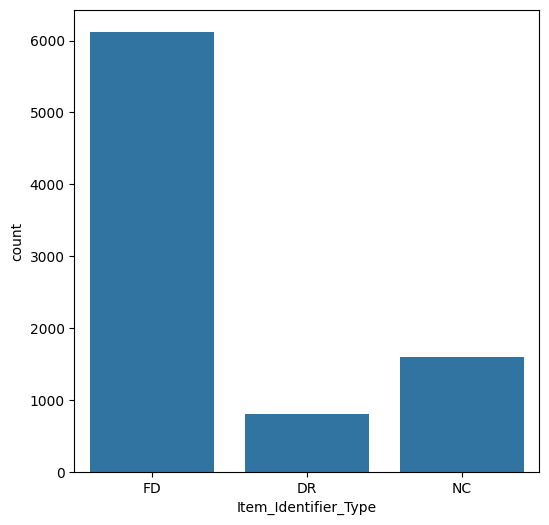

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Item_Identifier_Type'], data=df)
plt.show()


*   **FD: Food**
*   **DR: Drink**
*   **NC: Non-Consumable**

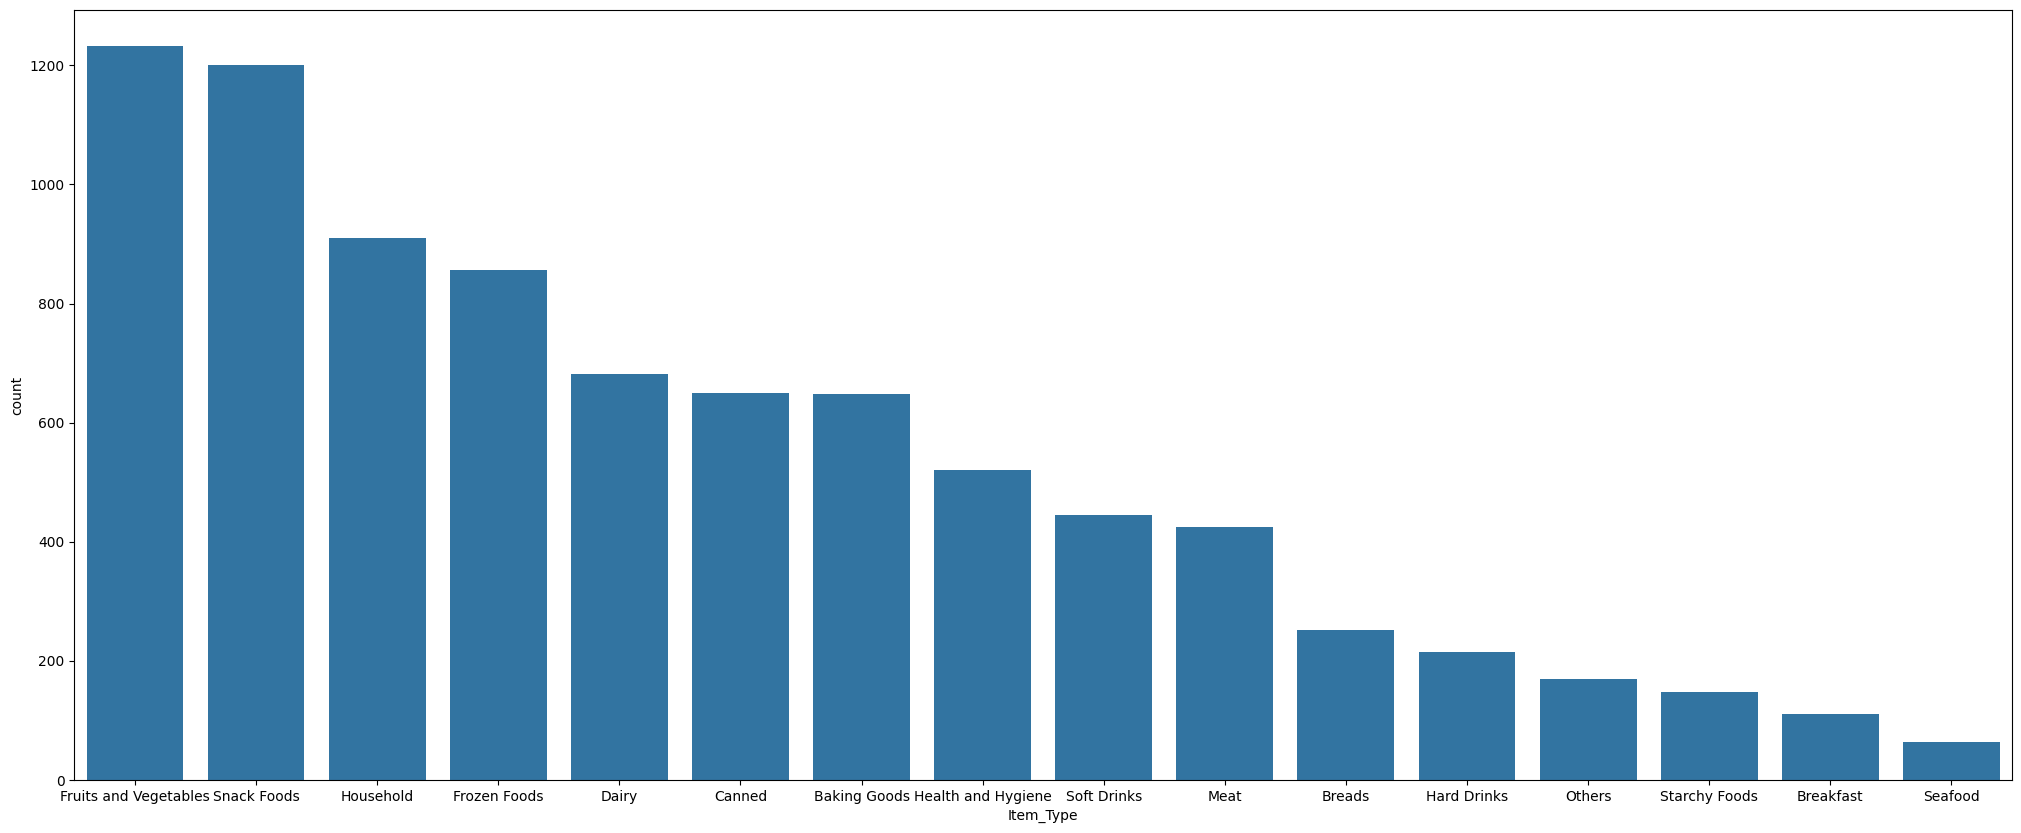

In [43]:
#Countplot for Item_Type

plt.figure(figsize=(25,10))
sns.countplot(x=df['Item_Type'], data=df, order=df['Item_Type'].value_counts().index)
plt.show()

--> ***Fruits, snacks, and household items are leading in item type, while breakfast and seafood are less attractive.***

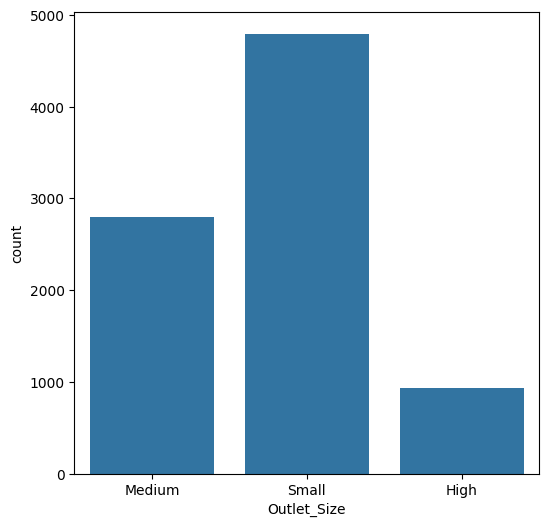

In [44]:
#Countplot for Outlet_Size

plt.figure(figsize=(6,6))
sns.countplot(x=df['Outlet_Size'], data=df)
plt.show()

--> ***Most sizes are small, with few being high size***

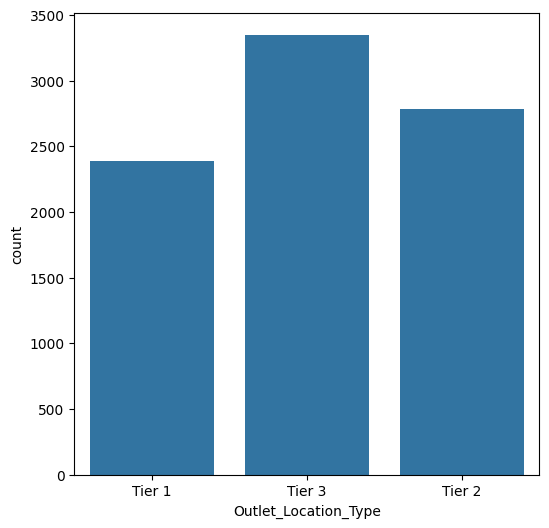

In [45]:
#Countplot for Outlet_Location_Type

plt.figure(figsize=(6,6))
sns.countplot(x=df['Outlet_Location_Type'], data=df)
plt.show()

--> ***The distribution shows a higher number of outlets in tier 3 locations, followed by tier 2 locations, and the least number in tier 1 locations***

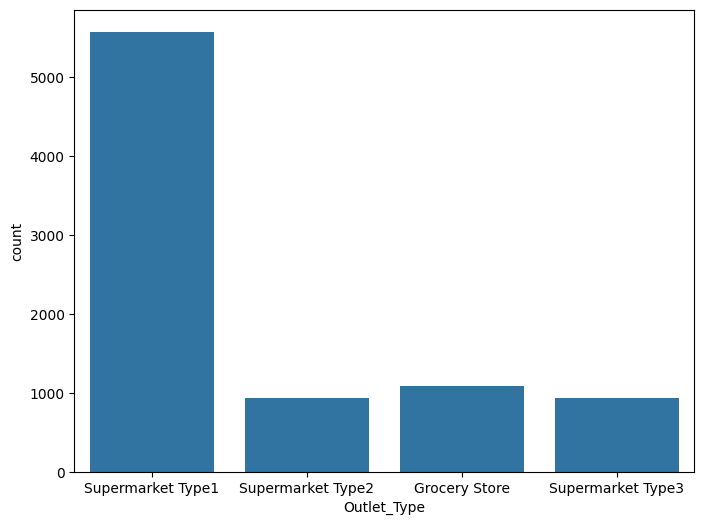

In [46]:
#Countplot for Outlet_Type

plt.figure(figsize=(8,6))
sns.countplot(x=df['Outlet_Type'], data=df)
plt.show()

--> ***Supermarket type 1 is the most repeated values***

In [49]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Item_Identifier_Type
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,FD
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,DR
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,FD
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,FD
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,NC


## **CONVERT CATEGORICAL COLUMNS TO NUMERICAL TYPES FOR THE MODEL TRAINING**

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
data_encoded = df.copy()

cat_cols = data_encoded.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [72]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Item_Identifier_Type,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,1.0,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,0.0,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,1.0,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,1.0,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,2.0,37


--> ***We gonna forecast the Sale, so we drop Item_Outlet_Sales as Y, others column as X***

In [77]:
X = data_encoded. drop ('Item_Outlet_Sales', axis=1)
y = data_encoded ['Item_Outlet_Sales']

X.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_interpolate,Item_Identifier_Type,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.30,0.016047,1.0,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.92,0.019278,0.0,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.50,0.016760,1.0,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.20,0.015755,1.0,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.93,0.014751,2.0,37


In [78]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

--> ***We gonna use the XGBRFRegressor and determine the importance features(columns) to make model more accuracy***

In [79]:
from xgboost import XGBRFRegressor

In [80]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)

xg1 = xg.fit(X,y)

pd. DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance', ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.498696
3,Item_MRP,0.173655
4,Outlet_Identifier,0.132657
11,Outlet_Age,0.124264
5,Outlet_Size,0.052625
6,Outlet_Location_Type,0.007157
9,Item_Visibility_interpolate,0.003181
8,Item_Weight_interpolate,0.002914
2,Item_Type,0.002063
0,Item_Identifier,0.001320


--> ***We going to consider first 4 features with high XGBRF_importance which are: Outlet_Type, Item_MPR, Outlet_Identifier, Outlet_Age***

In [81]:
final_data = X.drop(columns=['Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_interpolate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content', 'Item_Identifier_Type'], axis=1)

In [82]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,25
1,48.2692,3.0,2.0,15
2,141.6180,9.0,1.0,25
3,182.0950,0.0,0.0,26
4,53.8614,1.0,1.0,37
...,...,...,...,...
8518,214.5218,1.0,1.0,37
8519,108.1570,7.0,1.0,22
8520,85.1224,6.0,1.0,20
8521,103.1332,3.0,2.0,15


In [86]:
X = final_data

In [87]:
X.head()

,Item_MRP,Outlet_Identifier,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,25
1,48.2692,3.0,2.0,15
2,141.6180,9.0,1.0,25
3,182.0950,0.0,0.0,26
4,53.8614,1.0,1.0,37


In [88]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [89]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [91]:
model = XGBRFRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [92]:
y_pred = model.predict(X_test)

In [93]:
model_mae = mean_absolute_error(y_test, y_pred)
print(f"XGBRFRegressor Mean Absolute Error: {model_mae}")

XGBRFRegressor Mean Absolute Error: 711.393211558462


In [94]:
# Baseline prediction (mean of y_train)
baseline_pred = np.mean(y_train)

In [95]:
# Baseline MAE
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
print(f"Baseline Mean Absolute Error: {baseline_mae}")

Baseline Mean Absolute Error: 1321.738728500184


In [96]:
# Comparison
improvement = baseline_mae - model_mae
print(f"Improvement over baseline: {improvement}")

Improvement over baseline: 610.3455169417219


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [102]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.6197182538968178


--> **The difference between the baseline MAE and the model MAE. A positive improvement indicates that the model performs better than the baseline**

**The R2_Score = 0.62**

**The model can be acceptable and still have room for improvement**

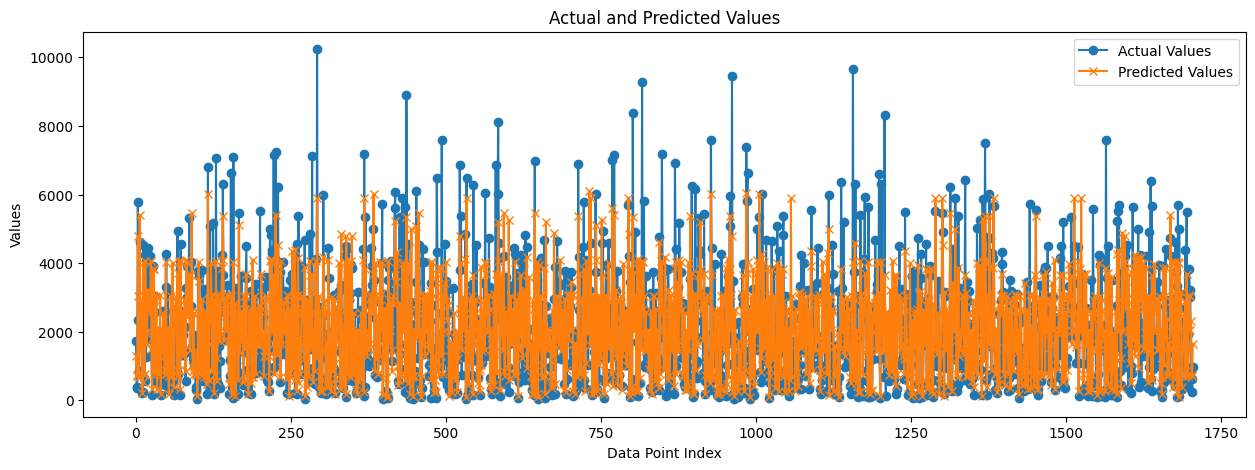

In [103]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Values', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()


In [109]:
# Let try forecast

predict_exp = model.predict(np.array([[141.6180,9.0,1.0,24]]))

In [110]:
print(f"Sales Value is between {predict_exp - 711.4} and {predict_exp + 711.4}")

Sales Value is between [1334.2344] and [2757.0344]
